# Trying to augment dataset
João Oliveira and Edgar Mendes

In [2]:
#-----------------------Imports

import numpy as np
import os
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import io
from io import BytesIO
from PIL import Image, ImageDraw
import pytz
from ipywidgets import IntProgress
from IPython.display import display
import time
import pydot
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import ipyplot 
import shutil
import os


#-------IDs das estações

idVianaDoCastelo = 1240610
idLeiria = 1210718
idAveiro = 1210702
idBeja = 1200562
idBraga = 6212124
idBraganca = 1200575
idCasteloBranco = 1200570
idPortalegre = 1200571
idPorto = 1240903
idSantarem = 1210734
idCoimbra = 1210707
idEvora = 1200558
idFaro = 1200554
idGuarda = 1210683
idLisboa = 7240919
idSetubal = 1210770
idVilaReal = 1240566
idViseu = 1240675

ids = np.array([1240610, 1210718, 1210702, 1200562, 6212124, 1200575, 1200570, 1200571, 
                1240903, 1210734, 1210707, 1200558, 1200554, 1210683, 7240919, 1210770, 
                1240566, 1240675])

IMAGE_WIDTH, IMAGE_HEIGHT = 200,200

def dict_to_array1D(input_dict):
    # Create an empty list to hold the values
    output_array = np.empty(0)
    # Loop over each key-value pair in the dictionary
    for date_dict in input_dict.values():
        for value in date_dict.values():
            # Append the value to the output array
            output_array = np.append(output_array,value)
    # Return the output array
    return output_array

def array1D_to_array2D(array_1D):
    array2D = np.empty(0)
    array2D = np.reshape(array_1D, (-1, 1))
    return array2D

def count_values(arr):
    counts = {}
    for num in arr:
        if num in counts:
            counts[num] += 1
        else:
            counts[num] = 1
    return counts

def count_numbers(d):
    count_zero = 0
    count_nonzero = 0
    for key, value in d.items():
        if key == 0:
            count_zero += value
        else:
            count_nonzero += value
    return count_zero, count_nonzero

def how_many_images_to_delete(counts_zero, counts_nonzero):
    return abs(counts_zero - counts_nonzero)
    
data_array = np.empty(0)

for stationJson in ids:
    currentDir = 'dataset/precipitation/'+str(stationJson)+'.json'
    with open(currentDir) as f:
        # Load the JSON data
        data = json.load(f)
    f.close()
    current_data_array = np.empty(0)
    current_data_array = dict_to_array1D(data)
    data_array = np.concatenate((data_array, current_data_array))
    
data_array = array1D_to_array2D(data_array)
print(f"Number of data: {len(data_array)}")

def list_folders_without_dataset():
    folders = []
    folder_path = os.getcwd()
    for name in os.listdir(folder_path):
        if os.path.isdir(os.path.join(folder_path, name)):
            if name.endswith("dataset"):
                # and name != "dataset"
                #folder_name = name.replace("dataset", "")
                folders.append(name)
    return folders

Number of data: 1167


# Horizontal flip

IntProgress(value=0, max=1167)

C:\Users\joao\AppData\Roaming\Python\Python39\site-packages\ipyplot\_utils.py:95: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



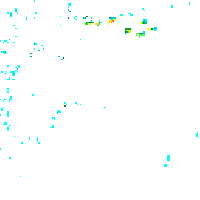
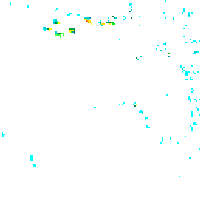


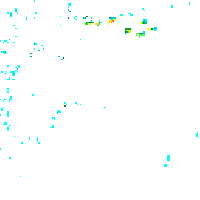
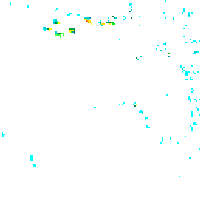

In [3]:
progress_bar_length = len(data_array)
f = IntProgress(min=0, max=progress_bar_length) # instantiate the bar
display(f) # display the bar

for stationFolder in ids:
    src_images_folder_path = 'dataset/images/'+str(stationFolder)+'/'
    dst_images_folder_path = 'horizontal_flip_dataset/images/'+str(stationFolder)+'/'

    # Get a list of all the files in the current folder
    src_file_list = os.listdir(src_images_folder_path)
    dst_file_list = os.listdir(dst_images_folder_path)

    # Filter the list to only include folders files
    src_days_folders_list = [file for file in src_file_list if os.path.isdir(os.path.join(src_images_folder_path, file))]
    dst_days_folders_list = [file for file in dst_file_list if os.path.isdir(os.path.join(dst_images_folder_path, file))]

    
    for day_folder in src_days_folders_list:
        
        src_current_path = src_images_folder_path + day_folder
        dst_current_path = dst_images_folder_path + day_folder
        
        #Get a list of all files in the folder 
        files_list = os.listdir(src_current_path)
        
        # Filter the list to only include images files
        image_list = [file for file in files_list if file.endswith('.png')]
        for i in range(len(image_list)):
            
            image_path = os.path.join(src_current_path, image_list[i])
            fliped_image_path = os.path.join(dst_current_path, image_list[i])
            
            image = Image.open(image_path)
            img_np = np.array(image)
            
            hflip= iaa.Fliplr(p=1.0)            
            input_hf = hflip.augment_image(img_np)
            final_image = Image.fromarray(input_hf)
            
            final_image.save(fliped_image_path)
            
            f.value += 1
            
images_list=[image, input_hf]
labels = ['Original', 'Horizontally flipped']
ipyplot.plot_images(images_list,labels=labels,img_width=200)
image.close()

# Vertical Flip

IntProgress(value=0, max=1167)


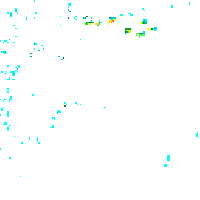
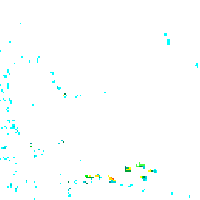


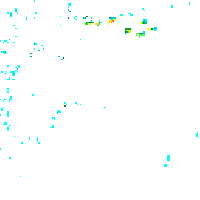
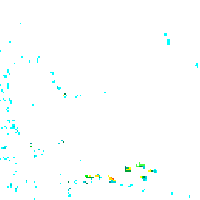

In [3]:
progress_bar_length = len(data_array)
f = IntProgress(min=0, max=progress_bar_length) # instantiate the bar
display(f) # display the bar

for stationFolder in ids:
    src_images_folder_path = 'dataset/images/'+str(stationFolder)+'/'
    dst_images_folder_path = 'vertical_flip_dataset/images/'+str(stationFolder)+'/'

    # Get a list of all the files in the current folder
    src_file_list = os.listdir(src_images_folder_path)
    dst_file_list = os.listdir(dst_images_folder_path)

    # Filter the list to only include folders files
    src_days_folders_list = [file for file in src_file_list if os.path.isdir(os.path.join(src_images_folder_path, file))]
    dst_days_folders_list = [file for file in dst_file_list if os.path.isdir(os.path.join(dst_images_folder_path, file))]

    
    for day_folder in src_days_folders_list:
        
        src_current_path = src_images_folder_path + day_folder
        dst_current_path = dst_images_folder_path + day_folder
        
        #Get a list of all files in the folder 
        files_list = os.listdir(src_current_path)
        
        # Filter the list to only include images files
        image_list = [file for file in files_list if file.endswith('.png')]
        for i in range(len(image_list)):
            
            image_path = os.path.join(src_current_path, image_list[i])
            fliped_image_path = os.path.join(dst_current_path, image_list[i])
            
            image = Image.open(image_path)
            img_np = np.array(image)            
            vflip= iaa.Flipud(p=1.0)
            input_vf = vflip.augment_image(img_np)           
            final_image = Image.fromarray(input_vf)            
            final_image.save(fliped_image_path)
            f.value += 1
            
images_list=[image, input_vf]
labels = ['Original', 'Vertically flipped']
ipyplot.plot_images(images_list,labels=labels,img_width=200)
image.close()

# Horizontal and Vertical Flip

In [1]:
progress_bar_length = len(data_array)
f = IntProgress(min=0, max=progress_bar_length) # instantiate the bar
display(f) # display the bar

for stationFolder in ids:
    src_images_folder_path = 'dataset/images/'+str(stationFolder)+'/'
    dst_images_folder_path = 'horizontal_and_vertical_flip_dataset/images/'+str(stationFolder)+'/'

    # Get a list of all the files in the current folder
    src_file_list = os.listdir(src_images_folder_path)
    dst_file_list = os.listdir(dst_images_folder_path)

    # Filter the list to only include folders files
    src_days_folders_list = [file for file in src_file_list if os.path.isdir(os.path.join(src_images_folder_path, file))]
    dst_days_folders_list = [file for file in dst_file_list if os.path.isdir(os.path.join(dst_images_folder_path, file))]

    
    for day_folder in src_days_folders_list:
        
        src_current_path = src_images_folder_path + day_folder
        dst_current_path = dst_images_folder_path + day_folder
        
        #Get a list of all files in the folder 
        files_list = os.listdir(src_current_path)
        
        # Filter the list to only include images files
        image_list = [file for file in files_list if file.endswith('.png')]
        for i in range(len(image_list)):
            
            image_path = os.path.join(src_current_path, image_list[i])
            fliped_image_path = os.path.join(dst_current_path, image_list[i])
            
            image = Image.open(image_path)
            img_np = np.array(image)
            print(type(img_np))
            vflip= iaa.Flipud(p=1.0)
            hflip= iaa.Fliplr(p=1.0)
            
            input_hf = hflip.augment_image(img_np)
            input_vf = vflip.augment_image(input_hf)
            
            final_image = Image.fromarray(input_vf)
            
            final_image.save(fliped_image_path)
            f.value += 1
            
images_list=[image, input_vf]
labels = ['Original', 'Vertically and horizontally flipped']
ipyplot.plot_images(images_list,labels=labels,img_width=200)
image.close()

NameError: name 'data_array' is not defined

# Rotate images

In [5]:
degrees = np.array([45,135])
folders = list_folders_without_dataset()

progress_bar_length = len(degrees)*len(folders)*len(data_array)
f = IntProgress(min=0, max=progress_bar_length) # instantiate the bar
display(f) # display the bar

for degree in degrees:
    for modified_dataset in folders:
        # Source folder path
        source_folder = 'dataset/'

        # Destination folder path
        destination_folder = os.getcwd()

        #--------------------------------------Fazer verificação para caso pasta já exista


        # Copy the source folder to the destination folder with a different name
        shutil.copytree(source_folder, destination_folder+'/'+str(degree)+'_rotated_'+modified_dataset)
        for stationFolder in ids:
            src_images_folder_path = modified_dataset+'/images/'+str(stationFolder)+'/'
            dst_images_folder_path = str(degree)+'_rotated_'+modified_dataset+'/images/'+str(stationFolder)+'/'

            # Get a list of all the files in the current folder
            src_file_list = os.listdir(src_images_folder_path)
            dst_file_list = os.listdir(dst_images_folder_path)

            # Filter the list to only include folders files
            src_days_folders_list = [file for file in src_file_list if os.path.isdir(os.path.join(src_images_folder_path, file))]
            dst_days_folders_list = [file for file in dst_file_list if os.path.isdir(os.path.join(dst_images_folder_path, file))]


            for day_folder in src_days_folders_list:

                src_current_path = src_images_folder_path + day_folder
                dst_current_path = dst_images_folder_path + day_folder

                #Get a list of all files in the folder 
                files_list = os.listdir(src_current_path)

                # Filter the list to only include images files
                image_list = [file for file in files_list if file.endswith('.png')]
                for i in range(len(image_list)):

                    image_path = os.path.join(src_current_path, image_list[i])
                    fliped_image_path = os.path.join(dst_current_path, image_list[i])

                    image = Image.open(image_path)                 
                    final_image = image.rotate(degree)              
                    #final_image = Image.fromarray(input_shear)
                    final_image.save(fliped_image_path)
                    f.value += 1

        image.close()
print("Done!")

IntProgress(value=0, max=9336)

Done!
